# Pandas Basics

## Contents:

 1. Features of Pandas
 2. Pandas vs Numpy
 3. Importing Pandas into Python
 4. Datasets in Pandas
    1. Series Data
    2. DataFrame
 5. Merge, Join and Concatenate functions
    1. Merge
    2. Join
    3. Concatenations
 6. Importing and analysing a dataset
 7. Cleaning the DataFrame
 8. Manipulating the data
 9. Other Data Manipulation
    1. Creating Categories from the data

## Features of Pandas

The first part of any data project is the handling and manipulation of data 
in order to prepare for data analysis. This is where the library Pandas comes in to assist the process.

the name Pandas comes from the word "Panel Data" - Which is a multi-dimension date of measurements of time. Pandas is an open source library to assist with data manipulation.

Features of Pandas:

 * Series Objects and Data Frames
     * Gives the ability to deal with 1 and 2 dimensional data
 * Handling of Missing Data
     * Presented as NaN
representation
 * Data Alignment
     * Data will be aligned to a set of labels or Pandas objects will allocate the data to a set of labels itself
 * Functions to Group the data
     * **Split**, **Combine**  and **apply** operations can be used
 * Slicing, Indexing and Sub-setting:
     * Can be done to the data set
 * Merging and Joining
    * Allows us to have an Intelligent method to combine multiple datasets
 * Reshape
   * Allows us to modify how the dataset looks for analysis
 * Hierarchical Labelling of Axes
 * Robust input output tool
     * Can input from multiple sources
 * Time series specific functionality

## Pandas vs Numpy

In Python there are two different Libraries that handle any data requests. We will be focusing on Pandas but it may be useful to see the difference between Numpy and Pandas:
 
 * Pandas works better with 500k+ rows than Numpy
 * Pandas Series is more flexible than Numpy Arrays

## Importing Pandas into Python

A Simple command is used to import pandas, much like the other libraries that may be Required:

In [1]:
import pandas as pd

In the command above we are importing the pandas library and we are allocating it a name that we will be able to use in the rest of the code (pd).

## Datasets in Pandas

Pandas handles anything between a one dimensional to a multiple dimension dataset.

If the data is one dimensional, Pandas will treat it as a Series object, If it is two dimension it will be treated as a DataFrame and finally multi-dimensional is treated as Panel data.

### Series Data

A series object is a Single column Array or single dimension data set that can hold any kind of data type. It can be mixed or similar data.

To create our first series object we will use the following data: (1,2,3,4).

Let's see how to create this into a series and then print the data:

In [2]:
data = [1,2,3,4]
Series1 = pd.Series(data)
Series1

0    1
1    2
2    3
3    4
dtype: int64

Please note that the data now has a 0 - 3 running down the side depicting the row number (Python is a language that is 0 indexed). Also remember that Python is case sensitive so use caution when allocating and calling variable names as well as the function calls.

To check the type of the object we can use the **type()** function:

In [3]:
type(Series1)

pandas.core.series.Series

It is nice that we have an index of 0 - 3 but we may not always want this automatic allocation and prefer a situation in which the index makes sense in terms of it's allocation. This can be done with including the **index** option in the series function.

Take note of the index after we run the function again.

In [4]:
Series1 = pd.Series(data,index=['a','b','c','d'])
Series1

a    1
b    2
c    3
d    4
dtype: int64

The Series data can also be created using array's, Dictionary, Scalar or Constant Value and is not limited to lists.

### DataFrame

A DataFrame is a two dimensional labeled data structure with columns storing potentially different data types. They have the following features:

* Different Column Types
* Mutable size
* Labeled axes
* Arithmetic operations on rows and columns

But the first important step is the creation of the DataFrame, we will now create a new list and turn it into a DataFrame:

In [5]:
data = [1,2,3,4,5]
df = pd.DataFrame(data)
df

,0
0,1
1,2
2,3
3,4
4,5


Note the big difference between the DataFrame and the Series is the inclusion of a column name per column and row name.

We can create the DataFrame from a dictionary as well, the example below demonstrates this with the number of fruits.

In [6]:
dictionary = {'fruits':['apples','banana','mangoes'],'count':[10,20,15]}
df = pd.DataFrame(dictionary)
df

,fruits,count
0,apples,10
1,banana,20
2,mangoes,15


We can now see that the columns have the labels from the dictionary as well as the data that is both the numerical and string values.

The next thing to look at is how to create a DataFrame from a Series:

In [7]:
Series = pd.Series([6,12],index=['a','b'])
df = pd.DataFrame(Series)
df

,0
a,6
b,12


Now we can see that the one dimensional Series was converted into a two dimensional DataFrame with an index and column. If you think about the original Series
example you will see that the new DataFrame now has a column name included.

Most data formats can be converted into a Pandas DataFrame in a similar fashion to all of these examples.

## Merge, Join and Concatenate functions

When we are working with multiple datasets we may get to a point where we will need to combine the datasets together. There are three different
 functions that allow us to do this and they each assist for a specific combination.

We will go through all of the three functions to see the differences. The first step in this example is to create two DataFrames:

In [8]:
#Dataframe 1 creation

player = ['Player1','Player2','Player3']
point=[8,9,6]
title=['Game1','Game2','Game3']

df1 = pd.DataFrame({'Player':player,'Points':point,'Title':title})
df1

,Player,Points,Title
0,Player1,8,Game1
1,Player2,9,Game2
2,Player3,6,Game3


In [9]:
#Dataframe 2 creation

player = ['Player1','Player5','Player6']
power = ['Punch','Kick','Elbow']
title=['Game1','Game5','Game6']
df2 = pd.DataFrame({'Player':player,'Power':power,'Title':title})
df2

,Player,Power,Title
0,Player1,Punch,Game1
1,Player5,Kick,Game5
2,Player6,Elbow,Game6


### Merge

The **Merge** function works with the data inside both of the DataFrames to join the data on common variables, this is especially useful if there are some
 unique identifiers that can be used to connect the data.

One of the first types of **Merge** is the Inner Merge. This **Merge** looks for the common values between the two DataFrames and only outputs a DataFrame
 with values that are common between the two DataFrames.

In [10]:
df1.merge(df2, on='Title',how='inner')

,Player_x,Points,Title,Player_y,Power
0,Player1,8,Game1,Player1,Punch


Notice that player is split up as it is not our joining variable and the columns name is a part of both DataFrames.

The next type of **Merge** is the Left **Merge**. This **Merge** keeps all of the values from the DataFrame on the left and includes only the relevant variables from the DataFrame on the right where they match up.

In [11]:
df1.merge(df2, on='Title',how='left')

,Player_x,Points,Title,Player_y,Power
0,Player1,8,Game1,Player1,Punch
1,Player2,9,Game2,NaN,NaN
2,Player3,6,Game3,NaN,NaN


Notice the NaN for the values missing in DataFrame 2 that could not be merged with DataFrame 1.

The next type of **Merge** is the Right **Merge**. It is very similar to the left **Merge** with the main change being that the data from the DataFrame on the right is kept but the data from the left DataFrame will be joined where applicable.

In [12]:
df1.merge(df2, on='Title',how='right')

,Player_x,Points,Title,Player_y,Power
0,Player1,8.0,Game1,Player1,Punch
1,NaN,NaN,Game5,Player5,Kick
2,NaN,NaN,Game6,Player6,Elbow


The final **Merge** is the Outer **Merge**. With this **Merge** Pandas will **Merge** both DataFrames together on the joining variables and the non applicable variables will contain a NaN value.

In [13]:
df1.merge(df2, on='Title',how='outer')

,Player_x,Points,Title,Player_y,Power
0,Player1,8.0,Game1,Player1,Punch
1,Player2,9.0,Game2,NaN,NaN
2,Player3,6.0,Game3,NaN,NaN
3,NaN,NaN,Game5,Player5,Kick
4,NaN,NaN,Game6,Player6,Elbow


### Join

When we used the **Merge** function it was required for the data to have one similar attribute to join the two DataSets however the join function **Merges** the data on the index of the DataFrames and does not require a common variable to perform the **Merge**.

Let's start with creating two DataFrames that will be joined together at a later stage.

In [14]:
#DataFrame 3 creation
player = ['Player1','Player2','Player3']
point=[8,9,6]
title=['Game1','Game2','Game3']

df3 = pd.DataFrame({'Player':player,'Points':point,'Title':title},index=['L1','L2','L3'])
df3

,Player,Points,Title
L1,Player1,8,Game1
L2,Player2,9,Game2
L3,Player3,6,Game3


In [15]:
#Dataframe 4 creation

player = ['Player1','Player5','Player6']
power = ['Punch','Kick','Elbow']
title=['Game1','Game5','Game6']
df4 = pd.DataFrame({'Players':player,'Power':power,'Titles':title},index=['L2','L3','L4'])
df4

,Players,Power,Titles
L2,Player1,Punch,Game1
L3,Player5,Kick,Game5
L4,Player6,Elbow,Game6


The first **Join** we will explore is the inner **Join**. Very much like the **Merge** function this will only combine the common indexes. 

One of the key differences between the **Join** and **Merge** functions is the column names must not be the same in either DataFrame for the **Join** function. So in this example you will see the title and player names are different between the two DataFrames.

In [16]:
df3.join(df4,how="inner")

,Player,Points,Title,Players,Power,Titles
L2,Player2,9,Game2,Player1,Punch,Game1
L3,Player3,6,Game3,Player5,Kick,Game5


The next **Join** is the left **Join**. Again like the **Merge** function of the same name it will keep all of the values in the left DataFrame and only join the matching data from the right DataFrame.

In [17]:
df3.join(df4,how="left")

,Player,Points,Title,Players,Power,Titles
L1,Player1,8,Game1,NaN,NaN,NaN
L2,Player2,9,Game2,Player1,Punch,Game1
L3,Player3,6,Game3,Player5,Kick,Game5


The final **Join** is the outer **Join**. Just like before this **Join** will include all of the data from both DataSets with NaN values filling in the spaces that are not common when we join the indexes.

In [18]:
df3.join(df4,how="outer")

,Player,Points,Title,Players,Power,Titles
L1,Player1,8.0,Game1,NaN,NaN,NaN
L2,Player2,9.0,Game2,Player1,Punch,Game1
L3,Player3,6.0,Game3,Player5,Kick,Game5
L4,NaN,NaN,NaN,Player6,Elbow,Game6


### Concatenations

**Concatenations** is the final method to combine two DataSets together. This does not perform a **Join** or **Merge** action but rather puts the two datasets on top of each other with no consideration of linking variables.

Using the same two DataSets as before we will **Concatenate** them and see the final results. Please note the inclusion of the NaN values.

In [19]:
pd.concat([df3,df4],sort=True)

,Player,Players,Points,Power,Title,Titles
L1,Player1,NaN,8.0,NaN,Game1,NaN
L2,Player2,NaN,9.0,NaN,Game2,NaN
L3,Player3,NaN,6.0,NaN,Game3,NaN
L2,NaN,Player1,NaN,Punch,NaN,Game1
L3,NaN,Player5,NaN,Kick,NaN,Game5
L4,NaN,Player6,NaN,Elbow,NaN,Game6


While this may not be ideal as there are is space with Missing values we can also choose which axis we merge the data sets on.

In [20]:
pd.concat([df3,df4],axis=1)


,Player,Points,Title,Players,Power,Titles
L1,Player1,8.0,Game1,NaN,NaN,NaN
L2,Player2,9.0,Game2,Player1,Punch,Game1
L3,Player3,6.0,Game3,Player5,Kick,Game5
L4,NaN,NaN,NaN,Player6,Elbow,Game6


As we can see this has put the data side by side but it has acted like a **Join** and concatenated on the common indexes.

## Importing and analysing a dataset

One of the key elements that we need to look at with any data science project is the importation of data.

Pandas offers many different importation methods to cover all kinds of datasets.

One of the first one's and most used one is csv:

In [21]:
data_in =pd.read_csv('Ratings.csv')

data_in

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt0100157,8,2014-04-21,Misery,https://www.imdb.com/title/tt0100157/,movie,7.8,107,1990,"Drama, Thriller",171962,1990-11-29,Rob Reiner
1,tt0100405,7,2019-06-16,Pretty Woman,https://www.imdb.com/title/tt0100405/,movie,7.0,119,1990,"Comedy, Romance",271083,1990-03-23,Garry Marshall
2,tt1007029,7,2014-04-22,The Iron Lady,https://www.imdb.com/title/tt1007029/,movie,6.4,105,2011,"Biography, Drama",98773,2011-12-26,Phyllida Lloyd
3,tt1010048,7,2015-03-13,Slumdog Millionaire,https://www.imdb.com/title/tt1010048/,movie,8.0,120,2008,"Drama, Romance",766624,2008-08-30,"Loveleen Tandan, Danny Boyle"
4,tt0101272,7,2014-04-21,The Addams Family,https://www.imdb.com/title/tt0101272/,movie,6.9,99,1991,"Comedy, Fantasy",123080,1991-11-19,Barry Sonnenfeld
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,tt0099088,8,2015-02-27,Back to the Future Part III,https://www.imdb.com/title/tt0099088/,movie,7.4,118,1990,"Adventure, Comedy, Sci-Fi, Western",376811,1990-05-25,Robert Zemeckis
702,tt0993846,9,2014-06-02,The Wolf of Wall Street,https://www.imdb.com/title/tt0993846/,movie,8.2,180,2013,"Biography, Crime, Drama",1087889,2013-12-09,Martin Scorsese
703,tt0099487,8,2015-02-20,Edward Scissorhands,https://www.imdb.com/title/tt0099487/,movie,7.9,105,1990,"Drama, Fantasy, Romance",426764,1990-12-06,Tim Burton
704,tt0099653,8,2015-02-20,Ghost,https://www.imdb.com/title/tt0099653/,movie,7.0,127,1990,"Drama, Fantasy, Romance, Thriller",186060,1990-07-13,Jerry Zucker


With the newly imported data we can find out how python has imported it by checking the **type**.

In [22]:
type(data_in)

pandas.core.frame.DataFrame

There may be moments when we need to look at certain parts of the data but don't want to view the full data set. 

There is where the **head** and **tail** comes in use. You can either keep the default of looking at the 5 values or parse a number for the number of rows you want to look at.

If it is the start of the data you will use the **head** function and the bottom of the data you will use **tail**.

In [23]:
data_in.head()

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt0100157,8,2014-04-21,Misery,https://www.imdb.com/title/tt0100157/,movie,7.8,107,1990,"Drama, Thriller",171962,1990-11-29,Rob Reiner
1,tt0100405,7,2019-06-16,Pretty Woman,https://www.imdb.com/title/tt0100405/,movie,7.0,119,1990,"Comedy, Romance",271083,1990-03-23,Garry Marshall
2,tt1007029,7,2014-04-22,The Iron Lady,https://www.imdb.com/title/tt1007029/,movie,6.4,105,2011,"Biography, Drama",98773,2011-12-26,Phyllida Lloyd
3,tt1010048,7,2015-03-13,Slumdog Millionaire,https://www.imdb.com/title/tt1010048/,movie,8.0,120,2008,"Drama, Romance",766624,2008-08-30,"Loveleen Tandan, Danny Boyle"
4,tt0101272,7,2014-04-21,The Addams Family,https://www.imdb.com/title/tt0101272/,movie,6.9,99,1991,"Comedy, Fantasy",123080,1991-11-19,Barry Sonnenfeld


The default **head** function will show up a default of the top 5 values however we can parse in a value to increase the display (For instance 10 below):

In [24]:
data_in.head(10)

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt0100157,8,2014-04-21,Misery,https://www.imdb.com/title/tt0100157/,movie,7.8,107,1990,"Drama, Thriller",171962,1990-11-29,Rob Reiner
1,tt0100405,7,2019-06-16,Pretty Woman,https://www.imdb.com/title/tt0100405/,movie,7.0,119,1990,"Comedy, Romance",271083,1990-03-23,Garry Marshall
2,tt1007029,7,2014-04-22,The Iron Lady,https://www.imdb.com/title/tt1007029/,movie,6.4,105,2011,"Biography, Drama",98773,2011-12-26,Phyllida Lloyd
3,tt1010048,7,2015-03-13,Slumdog Millionaire,https://www.imdb.com/title/tt1010048/,movie,8.0,120,2008,"Drama, Romance",766624,2008-08-30,"Loveleen Tandan, Danny Boyle"
4,tt0101272,7,2014-04-21,The Addams Family,https://www.imdb.com/title/tt0101272/,movie,6.9,99,1991,"Comedy, Fantasy",123080,1991-11-19,Barry Sonnenfeld
5,tt1013752,7,2014-04-21,Fast & Furious,https://www.imdb.com/title/tt1013752/,movie,6.6,107,2009,"Action, Adventure, Thriller",250291,2009-03-12,Justin Lin
6,tt1013977,9,2014-05-05,Dexter: It's Alive!,https://www.imdb.com/title/tt1013977/,tvEpisode,8.8,53,2007,"Crime, Drama, Mystery, Thriller",4036,2007-09-30,Tony Goldwyn
7,tt1013981,9,2014-05-05,Dexter: Waiting to Exhale,https://www.imdb.com/title/tt1013981/,tvEpisode,8.6,56,2007,"Crime, Drama, Mystery, Thriller",3643,2007-10-07,Marcos Siega
8,tt1013982,8,2014-05-05,Dexter: An Inconvenient Lie,https://www.imdb.com/title/tt1013982/,tvEpisode,8.7,52,2007,"Crime, Drama, Mystery, Thriller",3609,2007-10-14,Tony Goldwyn
9,tt1013983,8,2014-05-07,Dexter: See-Through,https://www.imdb.com/title/tt1013983/,tvEpisode,8.5,53,2007,"Crime, Drama, Mystery, Thriller",3443,2007-10-21,Nick Gomez


The same applies to the **tail** function:

In [25]:
data_in.tail()

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
701,tt0099088,8,2015-02-27,Back to the Future Part III,https://www.imdb.com/title/tt0099088/,movie,7.4,118,1990,"Adventure, Comedy, Sci-Fi, Western",376811,1990-05-25,Robert Zemeckis
702,tt0993846,9,2014-06-02,The Wolf of Wall Street,https://www.imdb.com/title/tt0993846/,movie,8.2,180,2013,"Biography, Crime, Drama",1087889,2013-12-09,Martin Scorsese
703,tt0099487,8,2015-02-20,Edward Scissorhands,https://www.imdb.com/title/tt0099487/,movie,7.9,105,1990,"Drama, Fantasy, Romance",426764,1990-12-06,Tim Burton
704,tt0099653,8,2015-02-20,Ghost,https://www.imdb.com/title/tt0099653/,movie,7.0,127,1990,"Drama, Fantasy, Romance, Thriller",186060,1990-07-13,Jerry Zucker
705,tt0099864,7,2015-02-20,It,https://www.imdb.com/title/tt0099864/,tvMiniSeries,6.8,192,1990,"Drama, Horror, Mystery, Thriller",110099,1990-11-18,NaN


In [26]:
data_in.tail(10)

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
696,tt0098084,7,2014-04-21,Pet Sematary,https://www.imdb.com/title/tt0098084/,movie,6.6,103,1989,"Horror, Thriller",89242,1989-04-21,Mary Lambert
697,tt0985699,9,2015-02-20,Valkyrie,https://www.imdb.com/title/tt0985699/,movie,7.1,121,2008,"Drama, History, Thriller, War",219249,2008-12-25,Bryan Singer
698,tt0986263,8,2014-04-21,Surrogates,https://www.imdb.com/title/tt0986263/,movie,6.3,89,2009,"Action, Sci-Fi, Thriller",165464,2009-09-24,Jonathan Mostow
699,tt0988045,8,2014-04-20,Sherlock Holmes,https://www.imdb.com/title/tt0988045/,movie,7.6,128,2009,"Action, Adventure, Crime, Mystery, Thriller",561544,2009-12-14,Guy Ritchie
700,tt0990407,5,2015-02-20,The Green Hornet,https://www.imdb.com/title/tt0990407/,movie,5.8,119,2011,"Action, Comedy",150988,2011-01-12,Michel Gondry
701,tt0099088,8,2015-02-27,Back to the Future Part III,https://www.imdb.com/title/tt0099088/,movie,7.4,118,1990,"Adventure, Comedy, Sci-Fi, Western",376811,1990-05-25,Robert Zemeckis
702,tt0993846,9,2014-06-02,The Wolf of Wall Street,https://www.imdb.com/title/tt0993846/,movie,8.2,180,2013,"Biography, Crime, Drama",1087889,2013-12-09,Martin Scorsese
703,tt0099487,8,2015-02-20,Edward Scissorhands,https://www.imdb.com/title/tt0099487/,movie,7.9,105,1990,"Drama, Fantasy, Romance",426764,1990-12-06,Tim Burton
704,tt0099653,8,2015-02-20,Ghost,https://www.imdb.com/title/tt0099653/,movie,7.0,127,1990,"Drama, Fantasy, Romance, Thriller",186060,1990-07-13,Jerry Zucker
705,tt0099864,7,2015-02-20,It,https://www.imdb.com/title/tt0099864/,tvMiniSeries,6.8,192,1990,"Drama, Horror, Mystery, Thriller",110099,1990-11-18,NaN


If we need more details about the number of rows and columns that have been imported in the data we can use the **shape** function. This will return a set of values to indicate the number of rows and columns present.

In [27]:
data_in.shape

(706, 13)

This means we have 706 rows and 13 columns in the DataFrame.

But this may not be enough information for us. We may want to check the number of values per variable as well as the type that each
 variable has been imported as. This is where the **info** function is highly useful.

In [28]:
data_in.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Const           706 non-null    object 
 1   Your Rating     706 non-null    int64  
 2   Date Rated      706 non-null    object 
 3   Title           706 non-null    object 
 4   URL             706 non-null    object 
 5   Title Type      706 non-null    object 
 6   IMDb Rating     706 non-null    float64
 7   Runtime (mins)  706 non-null    int64  
 8   Year            706 non-null    int64  
 9   Genres          706 non-null    object 
 10  Num Votes       706 non-null    int64  
 11  Release Date    706 non-null    object 
 12  Directors       685 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 49.7+ KB


At the dtypes info we can see we have 1 floating value, 4 integer columns and 8 objects in this dataset - this is a view of the data types in the current DataFrame.

The next bit will cover the various basic Statistic measures that we may want to look at. The first of which will be two locational measures (The **mean** and the **median**)

In [29]:
data_in.mean()

Your Rating            7.174221
IMDb Rating            7.043909
Runtime (mins)       111.237960
Year                2006.871105
Num Votes         322995.311615
dtype: float64

In [30]:
data_in.median()

Your Rating            7.0
IMDb Rating            7.0
Runtime (mins)       110.0
Year                2009.0
Num Votes         231925.0
dtype: float64

Notice that these location measures are automatically only run on the numerical variables and excludes the other variables in the DataFrame.

Now that we have a few measures of location, we should start looking at some of the measures of spread to see how we can analyse the data. One of the first methods is the
 *Standard Deviation* as well as the *Maximum* and *Minimum* values.

In [31]:
data_in.std()

Your Rating            1.178754
IMDb Rating            0.953678
Runtime (mins)        29.839857
Year                   9.197692
Num Votes         309869.726427
dtype: float64

In [32]:
data_in.max()

Const                                         tt9358204
Your Rating                                          10
Date Rated                                   2019-12-20
Title                                          Æon Flux
URL               https://www.imdb.com/title/tt9358204/
Title Type                                        video
IMDb Rating                                         9.7
Runtime (mins)                                      361
Year                                               2019
Genres                                 Sci-Fi, Thriller
Num Votes                                       2188152
Release Date                                 2019-12-16
dtype: object

In [33]:
data_in.min()

Const                                                     tt0055928
Your Rating                                                       2
Date Rated                                               2014-04-19
Title                                          (500) Days of Summer
URL                           https://www.imdb.com/title/tt0055928/
Title Type                                                    movie
IMDb Rating                                                     3.1
Runtime (mins)                                                    5
Year                                                           1962
Genres            Action, Adventure, Biography, Drama, History, ...
Num Votes                                                        10
Release Date                                             1962-10-05
dtype: object

Sometimes the measures of location and spread are not enough to indicate the underlying issues with the data -
 for instance missing data in the variables. This is where **count** can assist:

In [34]:
#count non null:

data_in.count()

Const             706
Your Rating       706
Date Rated        706
Title             706
URL               706
Title Type        706
IMDb Rating       706
Runtime (mins)    706
Year              706
Genres            706
Num Votes         706
Release Date      706
Directors         685
dtype: int64

And finally we may want to have a view of the full DataFrame. This is where the **describe** function comes in - it will offer various
 statistics for all of the quantitative variables in the dataset.

In [35]:
data_in.describe()

,Your Rating,IMDb Rating,Runtime (mins),Year,Num Votes
count,706.000000,706.000000,706.000000,706.000000,7.060000e+02
mean,7.174221,7.043909,111.237960,2006.871105,3.229953e+05
std,1.178754,0.953678,29.839857,9.197692,3.098697e+05
min,2.000000,3.100000,5.000000,1962.000000,1.000000e+01
25%,7.000000,6.400000,97.000000,2003.000000,1.197800e+05
50%,7.000000,7.000000,110.000000,2009.000000,2.319250e+05
75%,8.000000,7.700000,125.000000,2014.000000,4.264912e+05
max,10.000000,9.700000,361.000000,2019.000000,2.188152e+06


## Cleaning the DataFrame

Using the DataFrame as it comes may not be the ideal way to analyse without doing a bit of data cleaning.

One of the first steps we may want / required to do is the renaming of columns, notice we are passing a dictionary in with the recoding rules.

With these recoding rules there is two methods in which to save the changes. The first of which is inserting into the original variable, the other is to
use an extra option in the methods called **inplace**, in the following examples we will see both methods.

In [36]:
data_in = data_in.rename(columns={'URL':'Web Address'})
data_in.head()

,Const,Your Rating,Date Rated,Title,Web Address,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt0100157,8,2014-04-21,Misery,https://www.imdb.com/title/tt0100157/,movie,7.8,107,1990,"Drama, Thriller",171962,1990-11-29,Rob Reiner
1,tt0100405,7,2019-06-16,Pretty Woman,https://www.imdb.com/title/tt0100405/,movie,7.0,119,1990,"Comedy, Romance",271083,1990-03-23,Garry Marshall
2,tt1007029,7,2014-04-22,The Iron Lady,https://www.imdb.com/title/tt1007029/,movie,6.4,105,2011,"Biography, Drama",98773,2011-12-26,Phyllida Lloyd
3,tt1010048,7,2015-03-13,Slumdog Millionaire,https://www.imdb.com/title/tt1010048/,movie,8.0,120,2008,"Drama, Romance",766624,2008-08-30,"Loveleen Tandan, Danny Boyle"
4,tt0101272,7,2014-04-21,The Addams Family,https://www.imdb.com/title/tt0101272/,movie,6.9,99,1991,"Comedy, Fantasy",123080,1991-11-19,Barry Sonnenfeld


With Bigger data sets we may end up in a situation where we have variables that won't be usable in any future analysis we have planned. This
 is where we can use the drop columns to reduce the size of the full DataFrame.

In [37]:
data_in=data_in.drop(columns=['Const'])
data_in.head()

,Your Rating,Date Rated,Title,Web Address,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,8,2014-04-21,Misery,https://www.imdb.com/title/tt0100157/,movie,7.8,107,1990,"Drama, Thriller",171962,1990-11-29,Rob Reiner
1,7,2019-06-16,Pretty Woman,https://www.imdb.com/title/tt0100405/,movie,7.0,119,1990,"Comedy, Romance",271083,1990-03-23,Garry Marshall
2,7,2014-04-22,The Iron Lady,https://www.imdb.com/title/tt1007029/,movie,6.4,105,2011,"Biography, Drama",98773,2011-12-26,Phyllida Lloyd
3,7,2015-03-13,Slumdog Millionaire,https://www.imdb.com/title/tt1010048/,movie,8.0,120,2008,"Drama, Romance",766624,2008-08-30,"Loveleen Tandan, Danny Boyle"
4,7,2014-04-21,The Addams Family,https://www.imdb.com/title/tt0101272/,movie,6.9,99,1991,"Comedy, Fantasy",123080,1991-11-19,Barry Sonnenfeld


We may also need to do some recoding on certain variables in the DataFrame, this will follow a similar approach to the renaming with passing in a dictionary with the recoding rules.

Let's recode the Title type into numeric values:

In [38]:
recoding_rules = {'movie':1,'tvEpisode':2,'tvSeries':3,'short':4,'tvMiniSeries':5,'video':6,'tvMovie':7}
data_in['Title Type'].replace(recoding_rules,inplace=True)
data_in

,Your Rating,Date Rated,Title,Web Address,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,8,2014-04-21,Misery,https://www.imdb.com/title/tt0100157/,1,7.8,107,1990,"Drama, Thriller",171962,1990-11-29,Rob Reiner
1,7,2019-06-16,Pretty Woman,https://www.imdb.com/title/tt0100405/,1,7.0,119,1990,"Comedy, Romance",271083,1990-03-23,Garry Marshall
2,7,2014-04-22,The Iron Lady,https://www.imdb.com/title/tt1007029/,1,6.4,105,2011,"Biography, Drama",98773,2011-12-26,Phyllida Lloyd
3,7,2015-03-13,Slumdog Millionaire,https://www.imdb.com/title/tt1010048/,1,8.0,120,2008,"Drama, Romance",766624,2008-08-30,"Loveleen Tandan, Danny Boyle"
4,7,2014-04-21,The Addams Family,https://www.imdb.com/title/tt0101272/,1,6.9,99,1991,"Comedy, Fantasy",123080,1991-11-19,Barry Sonnenfeld
...,...,...,...,...,...,...,...,...,...,...,...,...
701,8,2015-02-27,Back to the Future Part III,https://www.imdb.com/title/tt0099088/,1,7.4,118,1990,"Adventure, Comedy, Sci-Fi, Western",376811,1990-05-25,Robert Zemeckis
702,9,2014-06-02,The Wolf of Wall Street,https://www.imdb.com/title/tt0993846/,1,8.2,180,2013,"Biography, Crime, Drama",1087889,2013-12-09,Martin Scorsese
703,8,2015-02-20,Edward Scissorhands,https://www.imdb.com/title/tt0099487/,1,7.9,105,1990,"Drama, Fantasy, Romance",426764,1990-12-06,Tim Burton
704,8,2015-02-20,Ghost,https://www.imdb.com/title/tt0099653/,1,7.0,127,1990,"Drama, Fantasy, Romance, Thriller",186060,1990-07-13,Jerry Zucker


While we have done the recoding through pandas with these rules, there will be some other methods that this can be done with other libraries.

In some instances the data we receive may be imported with the wrong variable types and need to be changed before we can include them in analysis.
First lets get the type of all the variables and then change year to type Float.

In [39]:
#changing the data type:
#of the year to float

data_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Your Rating     706 non-null    int64  
 1   Date Rated      706 non-null    object 
 2   Title           706 non-null    object 
 3   Web Address     706 non-null    object 
 4   Title Type      706 non-null    int64  
 5   IMDb Rating     706 non-null    float64
 6   Runtime (mins)  706 non-null    int64  
 7   Year            706 non-null    int64  
 8   Genres          706 non-null    object 
 9   Num Votes       706 non-null    int64  
 10  Release Date    706 non-null    object 
 11  Directors       685 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 49.7+ KB


In [40]:
data_in.Year = data_in.Year.astype(float)
data_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Your Rating     706 non-null    int64  
 1   Date Rated      706 non-null    object 
 2   Title           706 non-null    object 
 3   Web Address     706 non-null    object 
 4   Title Type      706 non-null    int64  
 5   IMDb Rating     706 non-null    float64
 6   Runtime (mins)  706 non-null    int64  
 7   Year            706 non-null    float64
 8   Genres          706 non-null    object 
 9   Num Votes       706 non-null    int64  
 10  Release Date    706 non-null    object 
 11  Directors       685 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 49.7+ KB


Once we have a working dataset and before we need to decide on the model to be applying to the data. we will need to determine the relationships.
One of the most basic ways of doing this is through the *Correlation matrix*:

In [41]:
# noinspection SpellCheckingInspection
data_in[['Your Rating','IMDb Rating','Runtime (mins)','Year']].corr()

,Your Rating,IMDb Rating,Runtime (mins),Year
Your Rating,1.000000,0.586351,-0.009205,0.066704
IMDb Rating,0.586351,1.000000,-0.014269,-0.155935
Runtime (mins),-0.009205,-0.014269,1.000000,0.016268
Year,0.066704,-0.155935,0.016268,1.000000


## Manipulating the data

Now that we have covered most of the ways we have to combine and fix issues in the data it is now time to look at the ways we can subset the data by either selecting rows, columns or both.

The first of which is to select specific columns using the **iloc** function (Stands for integer location) - this function only passes in numerical values in the selection. For the example we
want to select the third column so we will put a 2 in the column section of the selection criteria [,].

Since we are wanting the 3rd column we will use the **iloc[,]** to obtain this information, it is important to note that the inputs for the **[,]** is row,column. We are selecting all rows so will use ":" in the row request and 2 in the columns.

In [42]:
data_in.iloc[:,2]

0                           Misery
1                     Pretty Woman
2                    The Iron Lady
3              Slumdog Millionaire
4                The Addams Family
                  ...             
701    Back to the Future Part III
702        The Wolf of Wall Street
703            Edward Scissorhands
704                          Ghost
705                             It
Name: Title, Length: 706, dtype: object

Now that we have explored a specific way to select only one column the next consideration is how to slice sections of rows as well as sections of columns.
For this section we will first select the first 5 rows from columns 5. This requires us to use a " : " to indicate to select a range.

In [43]:
data_in.iloc[0:5,4]

0    1
1    1
2    1
3    1
4    1
Name: Title Type, dtype: int64

We can also use the selection to create a subset that will reduce the elements in the dataset based on an exclusion of certain variables rather than selecting only certain ones.
Since we have a starting location we won't include an ending point in the request.

In [44]:
data_in.iloc[5:,5:]

,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
5,6.6,107,2009.0,"Action, Adventure, Thriller",250291,2009-03-12,Justin Lin
6,8.8,53,2007.0,"Crime, Drama, Mystery, Thriller",4036,2007-09-30,Tony Goldwyn
7,8.6,56,2007.0,"Crime, Drama, Mystery, Thriller",3643,2007-10-07,Marcos Siega
8,8.7,52,2007.0,"Crime, Drama, Mystery, Thriller",3609,2007-10-14,Tony Goldwyn
9,8.5,53,2007.0,"Crime, Drama, Mystery, Thriller",3443,2007-10-21,Nick Gomez
...,...,...,...,...,...,...,...
701,7.4,118,1990.0,"Adventure, Comedy, Sci-Fi, Western",376811,1990-05-25,Robert Zemeckis
702,8.2,180,2013.0,"Biography, Crime, Drama",1087889,2013-12-09,Martin Scorsese
703,7.9,105,1990.0,"Drama, Fantasy, Romance",426764,1990-12-06,Tim Burton
704,7.0,127,1990.0,"Drama, Fantasy, Romance, Thriller",186060,1990-07-13,Jerry Zucker


If we want to select the columns by name rather than number we can use the location command or the **loc** function.

This also takes the input of [row,column] with the big difference of the columns passed through as strings.

Again we will go through a similar exercise as the iloc with the first selection of a full column, then a section of the column.

In [45]:
data_in.loc[:,'Year']

0      1990.0
1      1990.0
2      2011.0
3      2008.0
4      1991.0
        ...  
701    1990.0
702    2013.0
703    1990.0
704    1990.0
705    1990.0
Name: Year, Length: 706, dtype: float64

In [46]:
data_in.loc[:6,'Year']

0    1990.0
1    1990.0
2    2011.0
3    2008.0
4    1991.0
5    2009.0
6    2007.0
Name: Year, dtype: float64

## Other Data Manipulation

The next section will cover a few other elements of data manipulation that may become useful at a later stage.

The first of which is inserting values into a DataFrame, for this example we can insert a constant value of 1 in a row.

In [47]:
data_in['const']=1
data_in.head()

,Your Rating,Date Rated,Title,Web Address,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,const
0,8,2014-04-21,Misery,https://www.imdb.com/title/tt0100157/,1,7.8,107,1990.0,"Drama, Thriller",171962,1990-11-29,Rob Reiner,1
1,7,2019-06-16,Pretty Woman,https://www.imdb.com/title/tt0100405/,1,7.0,119,1990.0,"Comedy, Romance",271083,1990-03-23,Garry Marshall,1
2,7,2014-04-22,The Iron Lady,https://www.imdb.com/title/tt1007029/,1,6.4,105,2011.0,"Biography, Drama",98773,2011-12-26,Phyllida Lloyd,1
3,7,2015-03-13,Slumdog Millionaire,https://www.imdb.com/title/tt1010048/,1,8.0,120,2008.0,"Drama, Romance",766624,2008-08-30,"Loveleen Tandan, Danny Boyle",1
4,7,2014-04-21,The Addams Family,https://www.imdb.com/title/tt0101272/,1,6.9,99,1991.0,"Comedy, Fantasy",123080,1991-11-19,Barry Sonnenfeld,1


The next interesting manipulation is to apply a function to the full DataFrame row by row. In the example below we are going to create a
 new function that will multiple the values and then use the newly created function to apply it to all of the rows in the dataset.

In [48]:
f = lambda x:x*2

data_in['const']=data_in['const'].apply(f)
data_in.head()

,Your Rating,Date Rated,Title,Web Address,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,const
0,8,2014-04-21,Misery,https://www.imdb.com/title/tt0100157/,1,7.8,107,1990.0,"Drama, Thriller",171962,1990-11-29,Rob Reiner,2
1,7,2019-06-16,Pretty Woman,https://www.imdb.com/title/tt0100405/,1,7.0,119,1990.0,"Comedy, Romance",271083,1990-03-23,Garry Marshall,2
2,7,2014-04-22,The Iron Lady,https://www.imdb.com/title/tt1007029/,1,6.4,105,2011.0,"Biography, Drama",98773,2011-12-26,Phyllida Lloyd,2
3,7,2015-03-13,Slumdog Millionaire,https://www.imdb.com/title/tt1010048/,1,8.0,120,2008.0,"Drama, Romance",766624,2008-08-30,"Loveleen Tandan, Danny Boyle",2
4,7,2014-04-21,The Addams Family,https://www.imdb.com/title/tt0101272/,1,6.9,99,1991.0,"Comedy, Fantasy",123080,1991-11-19,Barry Sonnenfeld,2


In the example above we create a **lambda** function, this is a temporary anonymous function that will take one input (here it is x) and do a quick function on it.

The next application that is available to us is a way to sort the data by certain columns.

In [49]:
data_in.sort_values(by='Year')

,Your Rating,Date Rated,Title,Web Address,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,const
601,7,2015-03-13,Dr. No,https://www.imdb.com/title/tt0055928/,1,7.3,110,1962.0,"Action, Adventure, Thriller",138645,1962-10-05,Terence Young,2
604,8,2015-03-13,Goldfinger,https://www.imdb.com/title/tt0058150/,1,7.7,110,1964.0,"Action, Adventure, Thriller",163127,1964-09-17,Guy Hamilton,2
607,7,2015-02-27,Thunderball,https://www.imdb.com/title/tt0059800/,1,7.0,130,1965.0,"Action, Adventure, Thriller",98754,1965-12-09,Terence Young,2
610,8,2015-02-20,Dad's Army,https://www.imdb.com/title/tt0062552/,3,8.1,30,1968.0,"Comedy, War",5215,1968-07-31,NaN,2
612,9,2015-05-31,The Godfather,https://www.imdb.com/title/tt0068646/,1,9.2,175,1972.0,"Crime, Drama",1507586,1972-03-14,Francis Ford Coppola,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,7,2019-07-14,Pet Sematary,https://www.imdb.com/title/tt0837563/,1,5.8,101,2019.0,"Horror, Mystery, Thriller",66648,2019-03-16,"Dennis Widmyer, Kevin Kölsch",2
24,8,2019-10-07,Steven Universe: The Movie,https://www.imdb.com/title/tt10515852/,7,8.0,82,2019.0,"Animation, Action, Adventure, Comedy, Drama, F...",2915,2019-09-02,Rebecca Sugar,2
264,8,2019-06-28,Rocketman,https://www.imdb.com/title/tt2066051/,1,7.4,121,2019.0,"Biography, Drama, Music, Musical",93940,2019-05-16,Dexter Fletcher,2
602,9,2019-11-10,Doctor Sleep,https://www.imdb.com/title/tt5606664/,1,7.5,152,2019.0,"Drama, Fantasy, Horror, Thriller",66968,2019-10-30,Mike Flanagan,2


In [50]:
data_in.sort_values(by='Year',ascending=False)

,Your Rating,Date Rated,Title,Web Address,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,const
288,5,2019-11-09,Men in Black: International,https://www.imdb.com/title/tt2283336/,1,5.6,114,2019.0,"Action, Adventure, Comedy, Sci-Fi",84874,2019-06-11,F. Gary Gray,2
606,7,2019-05-27,Pokémon Detective Pikachu,https://www.imdb.com/title/tt5884052/,1,6.6,104,2019.0,"Action, Adventure, Comedy, Family, Mystery, Sc...",113162,2019-05-02,Rob Letterman,2
442,7,2019-05-02,The Lego Movie 2: The Second Part,https://www.imdb.com/title/tt3513498/,1,6.6,107,2019.0,"Animation, Action, Adventure, Comedy, Family, ...",45293,2019-02-02,Mike Mitchell,2
324,8,2019-12-20,Star Wars: Episode IX - The Rise of Skywalker,https://www.imdb.com/title/tt2527338/,1,6.9,142,2019.0,"Action, Adventure, Fantasy, Sci-Fi",250930,2019-12-16,J.J. Abrams,2
24,8,2019-10-07,Steven Universe: The Movie,https://www.imdb.com/title/tt10515852/,7,8.0,82,2019.0,"Animation, Action, Adventure, Comedy, Drama, F...",2915,2019-09-02,Rebecca Sugar,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,9,2015-05-31,The Godfather,https://www.imdb.com/title/tt0068646/,1,9.2,175,1972.0,"Crime, Drama",1507586,1972-03-14,Francis Ford Coppola,2
610,8,2015-02-20,Dad's Army,https://www.imdb.com/title/tt0062552/,3,8.1,30,1968.0,"Comedy, War",5215,1968-07-31,NaN,2
607,7,2015-02-27,Thunderball,https://www.imdb.com/title/tt0059800/,1,7.0,130,1965.0,"Action, Adventure, Thriller",98754,1965-12-09,Terence Young,2
604,8,2015-03-13,Goldfinger,https://www.imdb.com/title/tt0058150/,1,7.7,110,1964.0,"Action, Adventure, Thriller",163127,1964-09-17,Guy Hamilton,2


As much as it is useful for us to subset the data it is usually more useful for us to filter the data based on some criteria.
Look at the examples below on how we create filters and apply them.

In [51]:
data_in['Year']<1999

0       True
1       True
2      False
3      False
4       True
       ...  
701     True
702    False
703     True
704     True
705     True
Name: Year, Length: 706, dtype: bool

In the example above we have shown the results of the evaluation but have not applied the filter to the dataset. Let's now apply the filter to the associated dataset.

In [52]:
filter1 = data_in['Year']<1999
filtered_new = data_in[filter1]
filtered_new.head()

,Your Rating,Date Rated,Title,Web Address,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,const
0,8,2014-04-21,Misery,https://www.imdb.com/title/tt0100157/,1,7.8,107,1990.0,"Drama, Thriller",171962,1990-11-29,Rob Reiner,2
1,7,2019-06-16,Pretty Woman,https://www.imdb.com/title/tt0100405/,1,7.0,119,1990.0,"Comedy, Romance",271083,1990-03-23,Garry Marshall,2
4,7,2014-04-21,The Addams Family,https://www.imdb.com/title/tt0101272/,1,6.9,99,1991.0,"Comedy, Fantasy",123080,1991-11-19,Barry Sonnenfeld,2
12,7,2015-05-26,Beauty and the Beast,https://www.imdb.com/title/tt0101414/,1,8.0,84,1991.0,"Animation, Family, Fantasy, Musical, Romance",401814,1991-09-29,"Gary Trousdale, Kirk Wise",2
15,8,2015-09-30,Hook,https://www.imdb.com/title/tt0102057/,1,6.8,142,1991.0,"Adventure, Comedy, Family, Fantasy",221807,1991-12-08,Steven Spielberg,2


In the previous example we only filtered on one condition, let's now create a filter based on multiple variables:

In [53]:
filter2 = (data_in['Year']<1999) & (data_in['Your Rating']>7)
filter_review=data_in[filter2]
filter_review.head()

,Your Rating,Date Rated,Title,Web Address,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,const
0,8,2014-04-21,Misery,https://www.imdb.com/title/tt0100157/,1,7.8,107,1990.0,"Drama, Thriller",171962,1990-11-29,Rob Reiner,2
15,8,2015-09-30,Hook,https://www.imdb.com/title/tt0102057/,1,6.8,142,1991.0,"Adventure, Comedy, Family, Fantasy",221807,1991-12-08,Steven Spielberg,2
17,8,2014-04-20,The Silence of the Lambs,https://www.imdb.com/title/tt0102926/,1,8.6,118,1991.0,"Crime, Drama, Thriller",1187183,1991-01-30,Jonathan Demme,2
18,8,2014-04-21,Terminator 2: Judgment Day,https://www.imdb.com/title/tt0103064/,1,8.5,137,1991.0,"Action, Sci-Fi",946998,1991-07-01,James Cameron,2
22,8,2015-05-26,A Grand Day Out,https://www.imdb.com/title/tt0104361/,4,7.8,23,1989.0,"Animation, Short, Adventure, Comedy, Family, S...",29787,1989-11-04,Nick Park,2


As Python usually does not allow this kind of filtering, Pandas requires we include the brackets around the conditions.

### Creating Categories from the data:

Pandas also offers functionality to create categorical variables from the numerical values. This can be useful if we are wanting to do something specific with the groups. This is done with the **cut** method.

Let's create some groups for the different Decade's of the Movies watched:

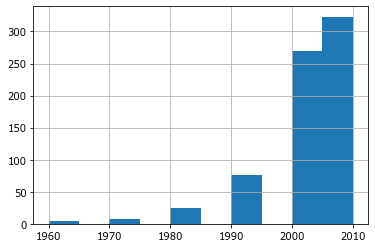

In [54]:
%matplotlib inline
Movies_decades = pd.cut(data_in['Year'],bins=[1960,1970,1980,1990,2000,2010,2020,2030],right=False,labels=[1960,1970,1980,1990,2000,2010,2020])

Movies_decades.hist()

A key element in using this method is the labels are always one less than the number of bins, this is to ensure that you include a maximum value to the final bin.

